# Explore here

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import numpy as np
import seaborn as sns

In [2]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
df = pd.read_csv(URL)
df.to_csv('../data/raw/raw_data.csv', index = False)

df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# The problem

we will try to study the behavior of the data to see which factors are relevant for the prediction of it.

## descriptive analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df[df.id.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [35]:
df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [5]:
df.neighbourhood.describe()

count            48895
unique             221
top       Williamsburg
freq              3920
Name: neighbourhood, dtype: object

In [6]:
df_description = df.describe()
df_description[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


As we can see, the data does not contain duplicates and has little null values. The only columns with missing information are name, host_name, last_review and reviews_per_month

also categorical variables are room_type, neighborhood, and neighborhood_group

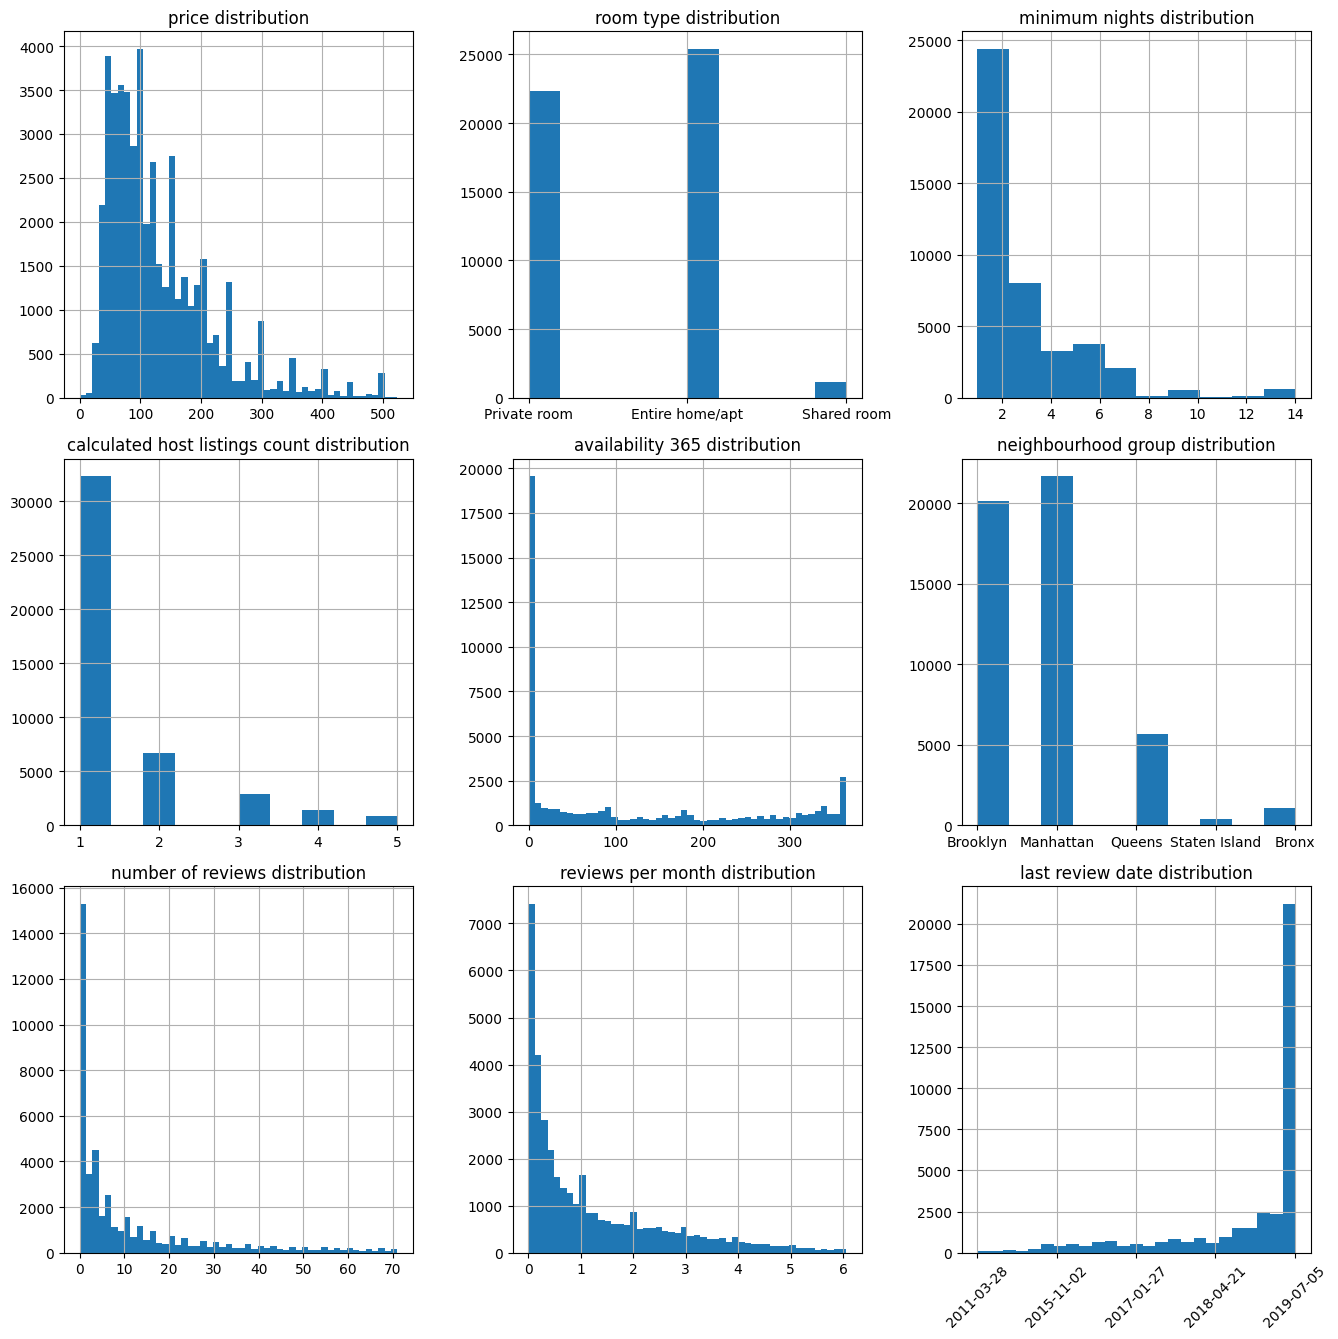

In [7]:
n = 3
m = 3
size_in = 4.5

fig, ax = plt.subplots(n,m)
fig.set_size_inches(size_in*m,size_in*n)

columns_to_graph = df[
    [
        'price',
        'room_type',
        'minimum_nights',
        'calculated_host_listings_count',
        'availability_365',
        'neighbourhood_group',
        'number_of_reviews',
        'reviews_per_month'
    ]
]

for index, column in enumerate(columns_to_graph):
    i, j = divmod(index, m)
    column_name = column.replace('_',' ')

    if column not in ['neighbourhood', 'neighbourhood_group', 'room_type', 'last_review']:
        # since the outliers are so big for each graph, i decided to graph only values that where less than 3 times
        # as big as the biggest value in the 75% percentile.
        # also the mask only applies for numerical variables
        mask = df[column] < df_description.loc['75%',column]*3 
    else:
        # for this variables the mask is different
        mask = df.index

    if column in [
        'minimum_nights',
        'calculated_host_listings_count',
        'neighbourhood_group',
        'room_type'
        ]:
        bins = None
    else:
        bins = 50
    
    ax[i,j].hist(df.loc[mask, column], bins=bins)
    ax[i,j].set_title(f'{column_name} distribution')
    ax[i,j].grid(True)


nonas = df.last_review.dropna().sort_values()
ax[2,2].set_title('last review date distribution')
ax[2,2].hist(nonas, bins = 25)
n = len(nonas.unique())-1
ax[2,2].set_xticks(nonas.unique()[::n//4])
ax[2,2].tick_params(axis='x', labelrotation = 45)
ax[2,2].grid(True)

plt.tight_layout()
plt.show()

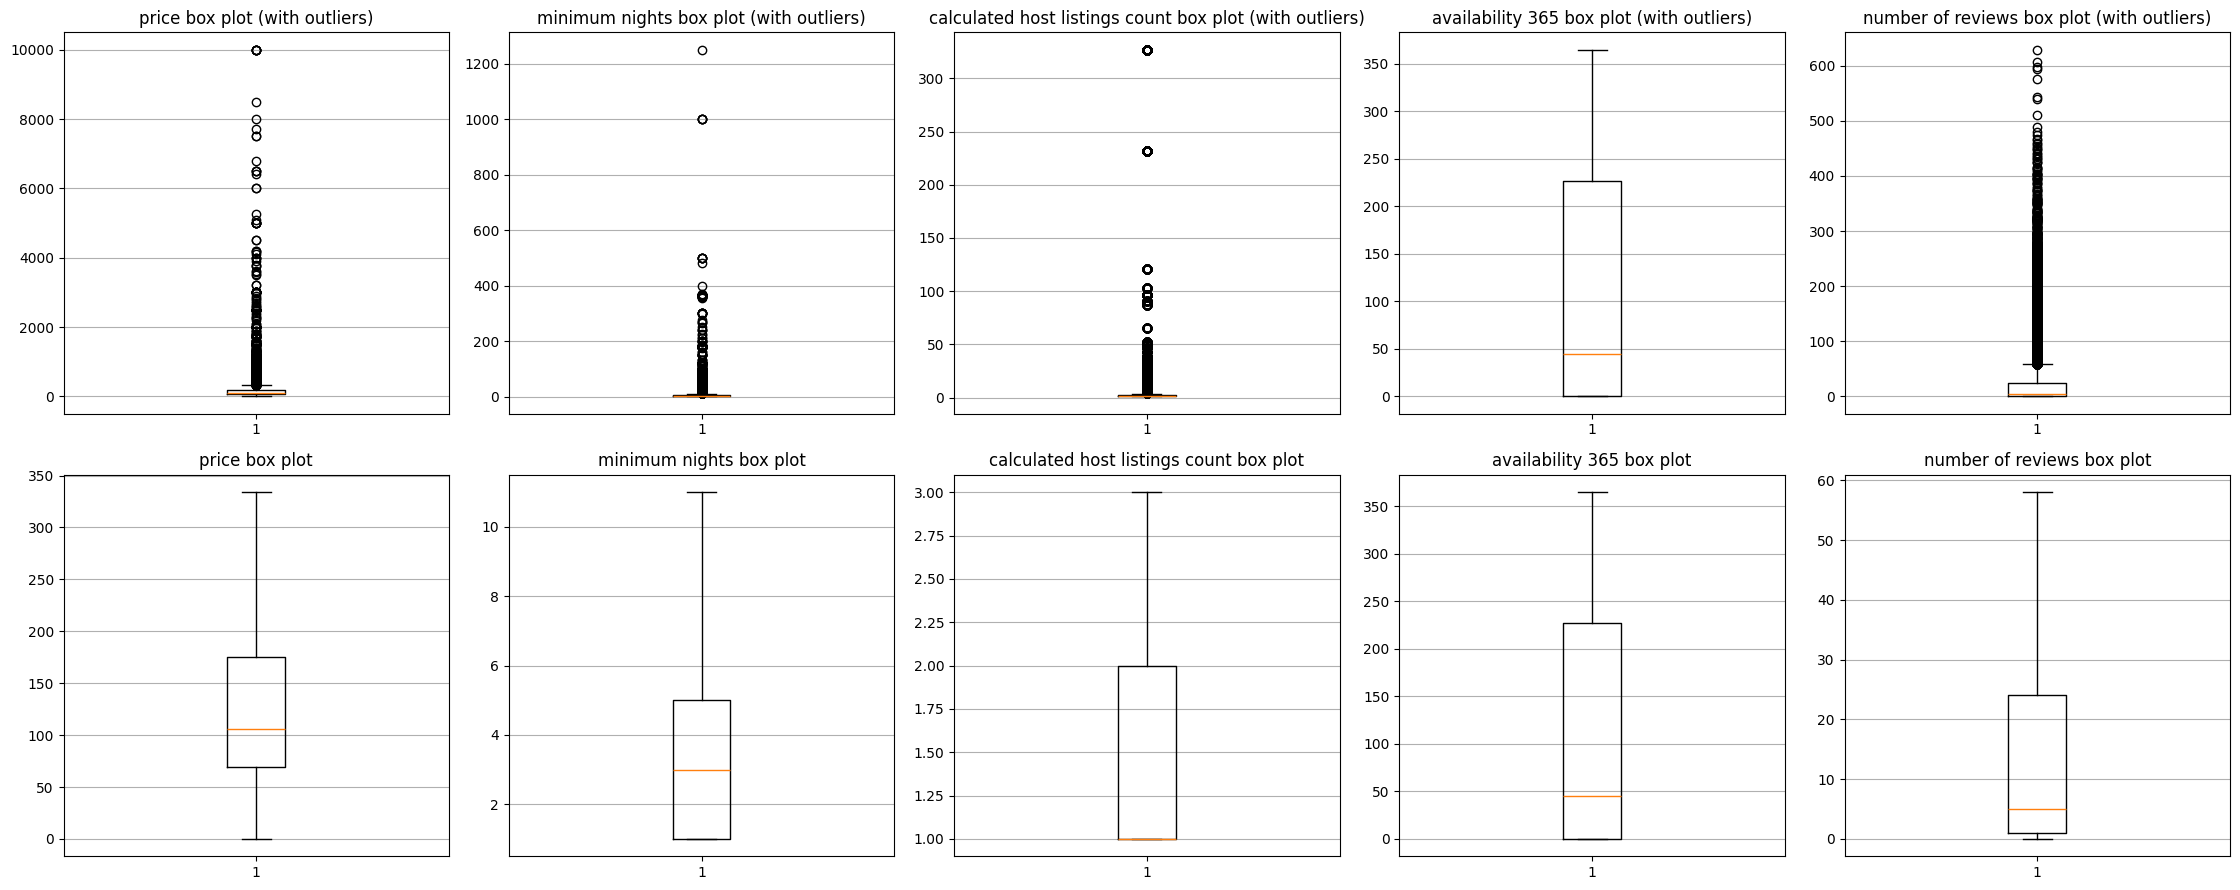

In [8]:
n = 2
m = 5
size_in = 4.5

fig, ax = plt.subplots(n,m)
fig.set_size_inches(size_in*m,size_in*n)

columns_to_graph = df[
    [
        'price',
        # 'room_type',
        'minimum_nights',
        'calculated_host_listings_count',
        'availability_365',
        # 'neighbourhood_group',
        'number_of_reviews'
    ]
]

for i, column in enumerate(columns_to_graph):
    column_name = column.replace('_',' ')

    ax[0,i].yaxis.grid(True)
    ax[0,i].boxplot(df[column])
    ax[0,i].set_title(f'{column_name} box plot (with outliers)')
      
    ax[1,i].yaxis.grid(True)
    ax[1,i].boxplot(df[column],showfliers=False)
    ax[1,i].set_title(f'{column_name} box plot')

plt.tight_layout()
plt.show()

#### outlier analysis

In [9]:
def outlier_printer(column):
    column_25 = df_description.loc['25%', column]
    column_75 = df_description.loc['75%', column]
    column_iqr = column_75 - column_25
    column_up = column_iqr*1.5 + column_75
    column_outliers = df[df[column] > column_up]
                                                                
    column_outliers = column_outliers.sort_values(column, ascending=False)
    return column_outliers

In [10]:

outlier_printer('calculated_host_listings_count')['host_name'].value_counts()

host_name
Sonder (NYC)      327
Blueground        232
Kara              125
Kazuya            103
Sonder             96
                 ... 
Audrey              4
René                4
Bruce               4
Jared               4
Lorenzo & Alex      4
Name: count, Length: 724, dtype: int64

In [86]:
price_outliers = outlier_printer('price')
price_outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44433,34222823,Spacious + beautiful Garden apt in brick townh...,831185,Andrew,Brooklyn,Crown Heights,40.67978,-73.96231,Entire home/apt,335,2,1,2019-07-01,1.00,3,365
10398,7966358,NYC High End 2BR Midtown West Apt,30283594,Kara,Manhattan,Midtown,40.76633,-73.98145,Entire home/apt,335,30,0,NaN,NaN,121,201
30330,23450331,Manhattan New York,14383640,Bob,Manhattan,Murray Hill,40.74848,-73.97609,Private room,335,4,0,NaN,NaN,1,365
19462,15528972,2 Bedroom in Upper West right next to Central ...,99865195,Sam,Manhattan,Upper West Side,40.79772,-73.96213,Entire home/apt,335,4,59,2019-05-12,1.89,1,263


In [12]:
minimum_nights = outlier_printer('minimum_nights')
minimum_nights.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
26341,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.12,6,249
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42
38664,30378211,Shared Studio (females only),200401254,Meg,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,NaN,NaN,1,365
47620,35834935,Williamsburg Apartment,82674375,Meg,Brooklyn,Williamsburg,40.70898,-73.94885,Entire home/apt,140,500,0,NaN,NaN,1,331
8014,6169897,Wonderful Large 1 bedroom,10720264,John,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,NaN,NaN,1,362
7355,5431845,Beautiful Fully Furnished 1 bed/bth,3680008,Aliya,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,2018-06-24,0.57,1,90
14285,11096888,Peaceful apartment close to F/G,2228137,Amanda,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,NaN,NaN,1,358
11193,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016-09-22,0.22,1,365


In [13]:
number_of_reviews = outlier_printer('number_of_reviews')
number_of_reviews.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


In [14]:
df[df.availability_365 == 0].shape

(17533, 16)

## First observations

- prices per night are aroun 150 USD.
- although the mean price is not that big, there are a lot of outliers with prices in the thousands of USD.
- most places are in Brooklyn or Manhattan.
- the availability_365 column has a lot of 0 values (17533), it is unclear why, but to me it looks like people listed with places with in this field 0 to avoid giving an exact number.
- there are some places that require staying times that look crazy, there is a chance some are typos but it is likely that those places are intended to be rented like a normal house. 
- the columns id, host_id, name and host_name are probably unrelated to most predictions we would like to make from this dataset.
- the hosts with the biggest number of listings appear to be companies (the Hotel Sonder and the renting agency Blueground)
- Some of the highest prices in listings might be actual prices, like in the case of luxury apartment in brooklyn (id = 13894339) but many of them look may correspond to a missinterpretation of the prices to put like the furnished room at queens(id = 7003697, it seems that the 10000 USD price in the listing is not for a night but for the 100 days minimum required stay) some others might be typos or propperties not intended for sataying as in a hotel like the film location at Brooklyn (id = 2953058)
- the most notable outliers in the number of reviews are cheap places, specially near some airport.



In [15]:
mapings = {
    'room_type' : {type_of_room: n for n, type_of_room in enumerate(df.room_type.value_counts().index)},
    'neighbourhood' : {place: n for n, place in enumerate(df.neighbourhood.value_counts().index)},
    'last_review' : {date: n for n, date in enumerate(df.last_review.value_counts().index)},
    'neighbourhood_group' : {place: n for n, place in enumerate(df.neighbourhood_group.value_counts().index)},
}

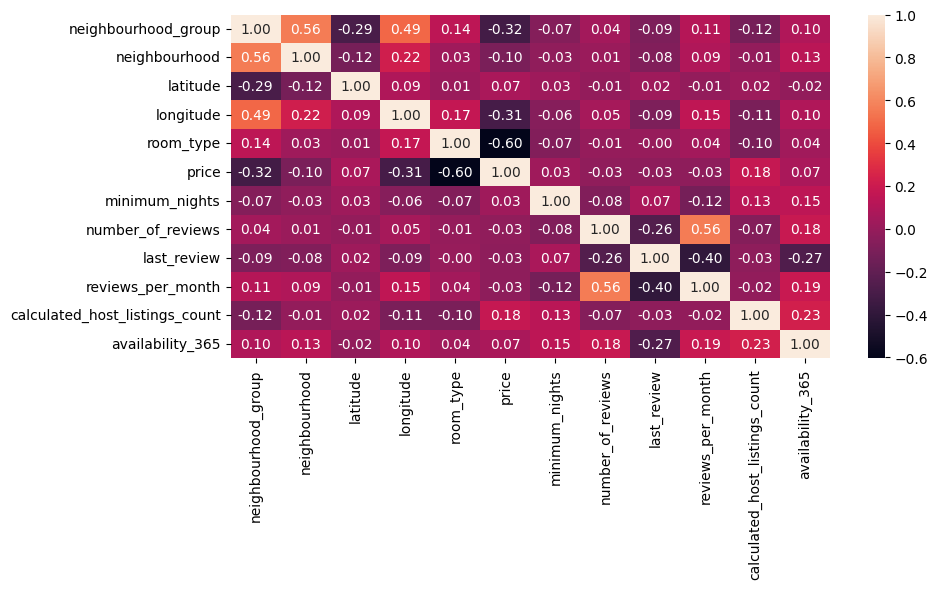

In [104]:

dfn = df[df.price < 350].copy()
dfn.drop(['id', 'host_id', 'name', 'host_name'], axis=1, inplace=True)

for column, dictionary in mapings.items():
    dfn[column] = dfn[column].map(dictionary)


fig, axis = plt.subplots(figsize = (10, 6))
sns.heatmap(dfn.corr(), annot = True, fmt = ".2f")
plt.tight_layout()

plt.show()

## feature engineering

We already found some of the basic characteristics of the data, now if we want to get information that helps us to predict the price of a listing based on the information we have, we need first to check some things we can get but are not directly reflected on the data, namely, price by neighborhood, distance to landmarks and distance to airports. 

To do the distance analysis I asked gemini for the coordinates of some landmarks and airports. that i will later use to find the euclidiean distance between those places and each listing.

Also on this step I choose to drop the price outliers, since it is likely data that won't help on predicting the price because on the likelyhood of being wrong. 

In [100]:
nyc_locations = {
    "JFK": {"latitude": 40.6413, "longitude": -73.7781},
    "LGA": {"latitude": 40.7769, "longitude": -73.8740},
    "EWR": {"latitude": 40.6895, "longitude": -74.1745},

    "Times_Square": {"latitude": 40.7589, "longitude": -73.9851},
    "Central_Park": {"latitude": 40.7851, "longitude": -73.9683}, # Central point
    "Wall_Street": {"latitude": 40.7060, "longitude": -74.0088},

    "Bridge_Park": {"latitude": 40.6992, "longitude": -73.9990},
    "Coney_Island": {"latitude": 40.5755, "longitude": -73.9817}, # Focus on the amusement area
    "Corona_Park": {"latitude": 40.7460, "longitude": -73.8470}, # Near Unisphere
    "Astoria_Park": {"latitude": 40.7797, "longitude": -73.9231} # Waterfront park with city views
}

distance_df = df[['price','neighbourhood_group', 'neighbourhood', 'latitude','longitude']].copy()
distance_df = distance_df[distance_df.price < 350]

for location, coordinates in nyc_locations.items():
    landmark_latitude = coordinates['latitude']
    landmark_longitude = coordinates['longitude']
    column_distance_name = location + '_distance'

    latitude_diff = (distance_df.latitude - landmark_latitude)**2
    longitude_diff = (distance_df.longitude - landmark_longitude)**2

    distance_df[column_distance_name] = (latitude_diff + longitude_diff)**(1/2)

distance_df['Manhattan'] = distance_df.neighbourhood_group == 'Manhattan'
distance_df['Brooklyn'] = distance_df.neighbourhood_group == 'Brooklyn'
distance_df['Bronx'] = distance_df.neighbourhood_group == 'Bronx'
distance_df['Queens'] = distance_df.neighbourhood_group == 'Queens'
distance_df['Staten_Island'] = distance_df.neighbourhood_group == 'Staten Island'

distance_columns = list(filter(lambda name: 'distance' in name, distance_df.columns))

distance_df['closest_landmark'] = distance_df[distance_columns].min(axis=1)

distance_df

,price,neighbourhood_group,neighbourhood,latitude,longitude,JFK_distance,LGA_distance,EWR_distance,Times_Square_distance,Central_Park_distance,...,Bridge_Park_distance,Coney_Island_distance,Corona_Park_distance,Astoria_Park_distance,Manhattan,Brooklyn,Bronx,Queens,Staten_Island,closest_landmark
0,149,Brooklyn,Kensington,40.64749,-73.97237,0.194369,0.162553,0.206449,0.112135,0.137670,...,0.058164,0.072592,0.159442,0.141092,False,True,False,False,False,0.058164
1,225,Manhattan,Midtown,40.75362,-73.98377,0.234341,0.112211,0.201220,0.005445,0.035076,...,0.056511,0.178132,0.136982,0.066038,True,False,False,False,False,0.005445
2,150,Manhattan,Harlem,40.80902,-73.94190,0.234436,0.075114,0.261511,0.066168,0.035625,...,0.123777,0.236887,0.113919,0.034830,True,False,False,False,False,0.034830
3,89,Brooklyn,Clinton Hill,40.68514,-73.95976,0.186875,0.125597,0.214784,0.077991,0.100324,...,0.041683,0.111814,0.128136,0.101418,False,True,False,False,False,0.041683
4,80,Manhattan,East Harlem,40.79851,-73.94399,0.228549,0.073250,0.254986,0.057088,0.027763,...,0.113528,0.226176,0.110292,0.028111,True,False,False,False,False,0.027763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,70,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,0.175837,0.124278,0.224818,0.087720,0.108138,...,0.053227,0.107811,0.123089,0.104672,False,True,False,False,False,0.053227
48891,40,Brooklyn,Bushwick,40.70184,-73.93317,0.166469,0.095578,0.241645,0.077153,0.090368,...,0.065883,0.135340,0.096827,0.078508,False,True,False,False,False,0.065883
48892,115,Manhattan,Harlem,40.81475,-73.94867,0.243267,0.083715,0.258238,0.066681,0.035559,...,0.126035,0.241519,0.122733,0.043386,True,False,False,False,False,0.035559
48893,55,Manhattan,Hell's Kitchen,40.75751,-73.99112,0.242657,0.118714,0.195585,0.006178,0.035804,...,0.058840,0.182254,0.144579,0.071548,True,False,False,False,False,0.006178


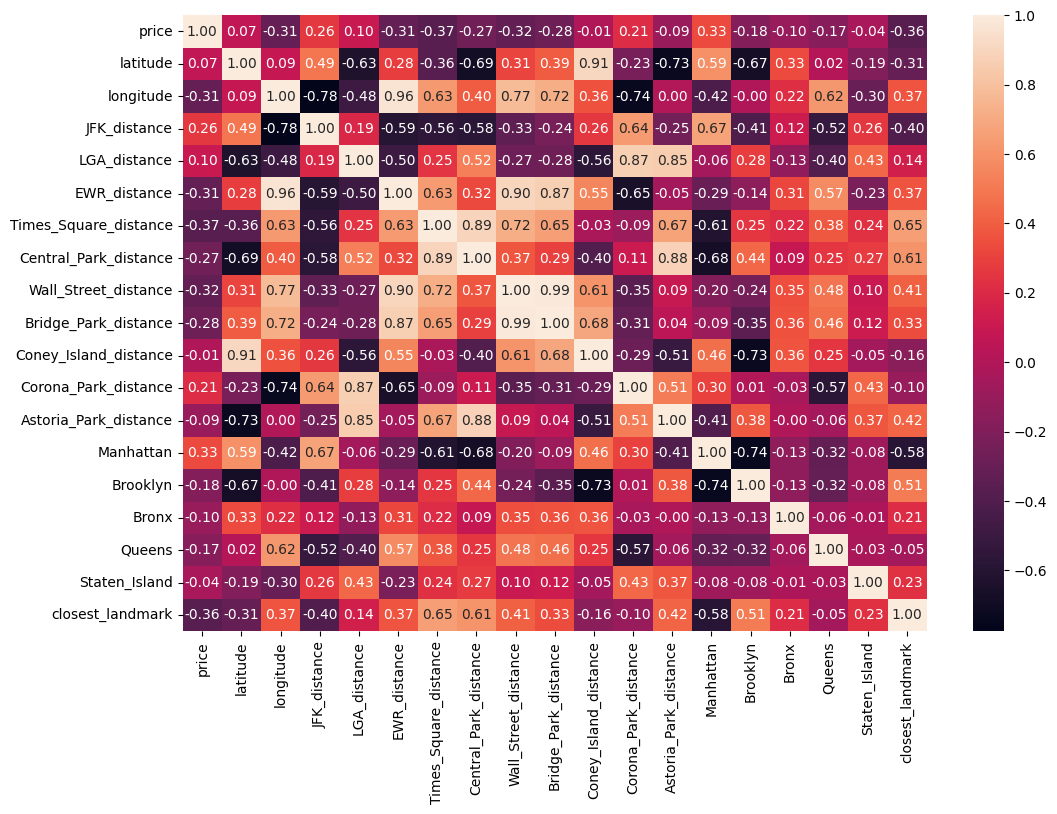

In [102]:
fig, axis = plt.subplots(figsize = (12, 8))
numeric_columns = list(filter(lambda name: 'neighbourhood' not in name, distance_df.columns))
sns.heatmap(distance_df[numeric_columns].corr(), annot = True, fmt = ".2f")
plt.tight_layout
plt.show()

/tmp/ipykernel_109115/135936739.py:36: RuntimeWarning: invalid value encountered in divide
  heatmap = sector_price/sector_listings
/tmp/ipykernel_109115/135936739.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_bins.round(3))
/tmp/ipykernel_109115/135936739.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_bins.round(3))


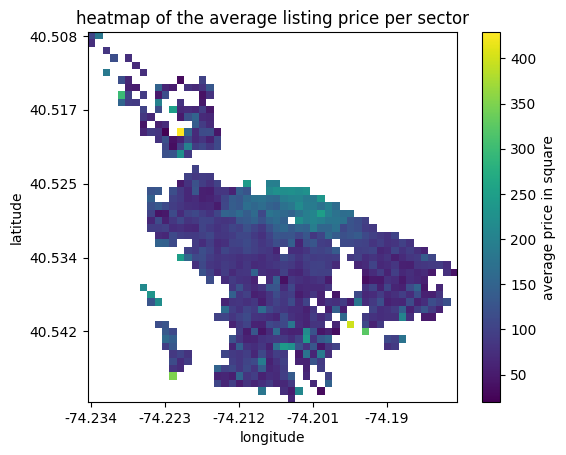

In [89]:
n = 50

S_range = lambda series: (series.min(), series.max())
latitude_range = S_range(df.latitude)
longitude_range = S_range(df.longitude)

sector_listings = np.zeros((n,n))
sector_price = np.zeros((n,n))

x_bins = np.linspace(longitude_range[0],longitude_range[1],n)
y_bins = np.linspace(latitude_range[0],latitude_range[1],n)

price_coordinates_df = df[['price','latitude','longitude']].copy()
price_coordinates_df = price_coordinates_df[price_coordinates_df.price < 500]

for listing_index in price_coordinates_df.index:
    i = -1
    for x in x_bins:
        if x <= price_coordinates_df.loc[listing_index, 'longitude']:
            i += 1
        else:
            break

    j = -1
    for y in y_bins:
        if y <= price_coordinates_df.loc[listing_index, 'latitude']:
            j += 1
        else:
            break

    sector_listings[i,j] += 1
    sector_price[i,j] += price_coordinates_df.loc[listing_index, 'price']

    price_coordinates_df.loc[listing_index]

heatmap = sector_price/sector_listings

fig, ax = plt.subplots()
im = ax.imshow(heatmap)
ax.set_title('heatmap of the average listing price per sector')

ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.set_xticklabels(x_bins.round(3))
ax.set_yticklabels(y_bins.round(3))

fig.colorbar(im, ax=ax, label = 'average price in square')

plt.show()


## feature selection

the rule im going to follow for the feature selection is the next: if the magnitude of the correlation coefficient is greater or equal than 0.1 then I will select the feature. 
features related to distance (distance to):
- JFK (Airport).
- EWR (Airport).
- LGA (Airport).
- Times square.
- Central Park.
- Wall St.
- Bridge Park.
- Corona Park.

features related to the neighborhood and position:
- is in Manhattan
- is in Brooklyn
- is in Bronx
- is in Queens
- longitude

other:
- Room type
- host listing count
- neighborhood
- neighborhood group

Although neighborhood and neighborhood group appear to be variables related to the location, the numbers assigned to its values were actually based on how many listings where on each neighborhood and group, so technically the number assigned to each possible value encodes the popularity ranking for each one of thos two columns, this is, manhattan was assigned 1 because its the most popular neighborhood group, Brooklyn 2 because it was the second, etc.

so this is the final dataframe:


In [112]:

distance_features = distance_df[
    [
        'JFK_distance',
        'LGA_distance',
        'EWR_distance',
        'Times_Square_distance',
        'Central_Park_distance',
        'Wall_Street_distance',
        'Bridge_Park_distance',
        'Corona_Park_distance'
    ]
]

position_features = distance_df[
    [        
        'Manhattan',
        'Brooklyn',
        'Bronx',
        'Queens',
        'longitude'
    ]
]

other_features = dfn[
    [
    'room_type',
    'calculated_host_listings_count',
    'neighbourhood',
    'neighbourhood_group'
    ]
]

final_df = pd.concat([distance_features, position_features, other_features], axis=1)
final_df


,JFK_distance,LGA_distance,EWR_distance,Times_Square_distance,Central_Park_distance,Wall_Street_distance,Bridge_Park_distance,Corona_Park_distance,Manhattan,Brooklyn,Bronx,Queens,longitude,room_type,calculated_host_listings_count,neighbourhood,neighbourhood_group
0,0.194369,0.162553,0.206449,0.112135,0.137670,0.068924,0.058164,0.159442,False,True,False,False,-73.97237,1,6,52,1
1,0.234341,0.112211,0.201220,0.005445,0.035076,0.053797,0.056511,0.136982,True,False,False,False,-73.98377,0,2,9,0
2,0.234436,0.075114,0.261511,0.066168,0.035625,0.122836,0.123777,0.113919,True,False,False,False,-73.94190,1,1,2,0
3,0.186875,0.125597,0.214784,0.077991,0.100324,0.053292,0.041683,0.128136,False,True,False,False,-73.95976,0,1,19,1
4,0.228549,0.073250,0.254986,0.057088,0.027763,0.112953,0.113528,0.110292,True,False,False,False,-73.94399,0,1,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,0.175837,0.124278,0.224818,0.087720,0.108138,0.064946,0.053227,0.123089,False,True,False,False,-73.94995,1,2,1,1
48891,0.166469,0.095578,0.241645,0.077153,0.090368,0.075744,0.065883,0.096827,False,True,False,False,-73.93317,1,2,3,1
48892,0.243267,0.083715,0.258238,0.066681,0.035559,0.124267,0.126035,0.122733,True,False,False,False,-73.94867,0,1,2,0
48893,0.242657,0.118714,0.195585,0.006178,0.035804,0.054460,0.058840,0.144579,True,False,False,False,-73.99112,2,6,5,0
